In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
data = pd.read_csv('projects/salesperformance.csv', index_col = 'Date Order Entered', parse_dates = True)
data #Sales and Order Data: 1/1/2017 to 12/31/2019

,Customer,Job#,Days from Enter to Due,Due Date,Shipped,Days Early/Late,Days from Enter to Ship
Date Order Entered,,,,,,,
2020-04-22,Customer 1,241783B,16,05/08/2020,05/05/2020,-3.0,13.0
2017-09-12,Customer 1,238560,10,09/22/2017,09/22/2017,0.0,10.0
2017-09-12,Customer 1,238560,59,11/10/2017,09/27/2017,-44.0,15.0
2020-03-22,Customer 2,242024,26,04/17/2020,04/24/2020,7.0,33.0
2020-03-22,Customer 2,242023,26,04/17/2020,04/24/2020,7.0,33.0
...,...,...,...,...,...,...,...
2019-11-04,Customer 16,241530,38,12/12/2019,12/12/2019,0.0,38.0
2019-11-04,Customer 16,241530,101,02/13/2020,02/12/2020,-1.0,100.0
2019-11-04,Customer 16,241530,140,03/23/2020,03/23/2020,0.0,140.0


In [102]:
data = data.dropna() #Dropping null values.

In [103]:
data.describe()
#Average Days Late: 8.54
#Half of all orders are not delivered on time.
#The standard deviation of an order's lateness is about a month.
#On average, it takes them 63 days to ship an order (or about 2 months). This is about 9 days sooner than the average due date.

,Days from Enter to Due,Days Early/Late,Days from Enter to Ship
count,10209.000000,10209.000000,10209.000000
mean,54.335880,8.551474,63.000882
std,56.881228,27.388505,61.346208
min,-62.000000,-132.000000,-19.000000
25%,17.000000,-4.000000,23.000000
50%,39.000000,0.000000,49.000000
75%,73.000000,15.000000,84.000000
max,491.000000,525.000000,926.000000


In [104]:
cust_counts = data['Customer'].value_counts() #Removing all small customers ( < 10 orders )
to_remove = cust_counts[cust_counts < 10].index
custData = data[~data.Customer.isin(to_remove)]

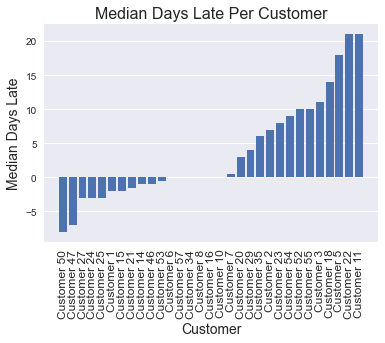

In [105]:
%matplotlib inline
mDaysLate = custData.groupby('Customer').median()
mDaysLate = mDaysLate['Days Early/Late'].sort_values()
plt.bar(x = mDaysLate.index, height = mDaysLate)
plt.style.use('seaborn')
plt.xticks(rotation = 'vertical', fontsize = 12)
plt.title('Median Days Late Per Customer', fontsize = 16)
plt.xlabel('Customer', fontsize = 14)
plt.ylabel('Median Days Late', fontsize = 14)
plt.grid(axis = 'x');

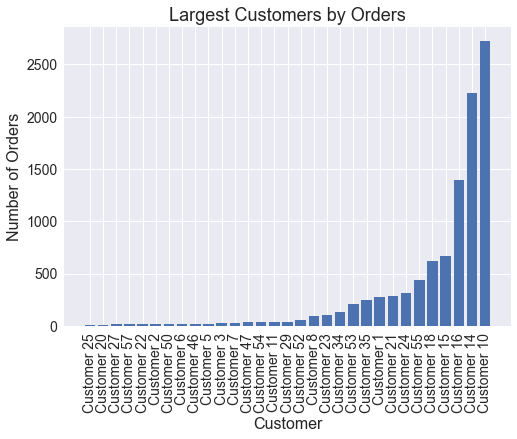

In [106]:
%matplotlib inline
custCount = custData.groupby('Customer').count()
custCount = custCount.sort_values('Job#', ascending = True)
plt.style.use('seaborn')
plt.title('Largest Customers by Orders', fontsize = 18)
plt.xlabel('Customer', fontsize = 16)
plt.ylabel('Number of Orders', fontsize = 16)
plt.bar(custCount.index, custCount['Job#'])
plt.xticks(rotation = 'vertical', fontsize = 14)
plt.yticks(fontsize = 14); #10, #14 and #16 are the lion's share of the past 3 years of the business

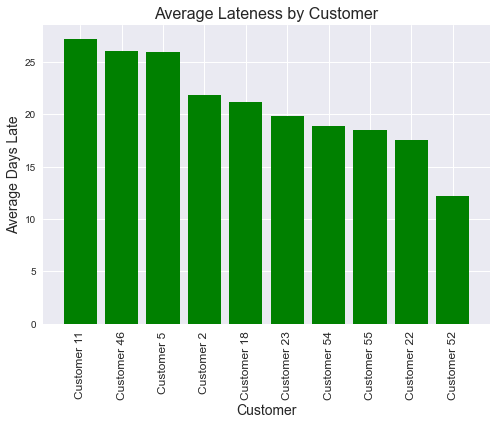

In [107]:
%matplotlib inline
custAvg = custData.groupby('Customer').mean()
custTopAvg = custAvg.sort_values('Days Early/Late', ascending = False).iloc[:10]
plt.style.use('seaborn')
plt.title('Average Lateness by Customer', fontsize = 16)
plt.xlabel('Customer', fontsize = 14)
plt.ylabel('Average Days Late', fontsize = 14)
plt.xticks(rotation = 'vertical', fontsize = 12)
plt.bar(custTopAvg.index, custTopAvg['Days Early/Late'], color = 'Green');

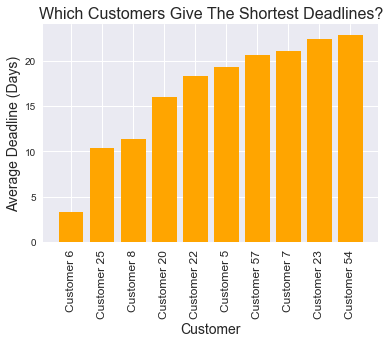

In [108]:
%matplotlib inline
custEarly = custAvg.sort_values('Days from Enter to Due', ascending = True).iloc[:10]
plt.bar(custEarly.index, custEarly['Days from Enter to Due'], color = 'Orange')
plt.style.use('seaborn')
plt.title('Which Customers Give The Shortest Deadlines?', fontsize = 16)
plt.xlabel('Customer', fontsize = 14)
plt.ylabel('Average Deadline (Days)', fontsize = 14)
plt.xticks(rotation = 'vertical', fontsize = 12);
#Though some of these orders may be related to low total order counts, it's good to know when customers are going to ask you to deliver quickly.

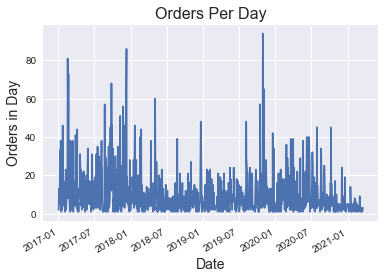

In [109]:
%matplotlib inline
data.groupby('Date Order Entered')['Job#'].count().plot()
plt.style.use('seaborn')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Orders in Day', fontsize = 14)
plt.title('Orders Per Day', fontsize = 16);

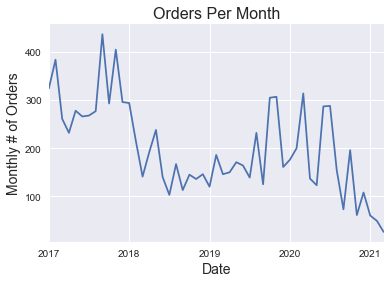

In [110]:
%matplotlib inline
monthly = data.resample('M').count() #Resampling the data to be Monthly
monthly['Job#'].plot()
plt.style.use('seaborn')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly # of Orders', fontsize = 14)
plt.title('Orders Per Month', fontsize = 16); #Generally trending downward, but this data doesn't include order size or $ amounts to generalize on the firm's performance

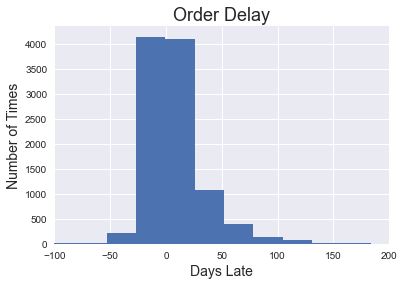

In [111]:
%matplotlib inline
plt.hist(data['Days Early/Late'], bins = 25)
plt.title('Order Delay', fontsize = 18)
plt.xlabel('Days Late', fontsize = 14)
plt.ylabel('Number of Times', fontsize = 14)
plt.style.use('seaborn')
plt.xlim(xmin = -100, xmax = 200);
#When orders are delivered on time, they are typically sent back within 25 days. Late orders have a longer tail and can take much longer.

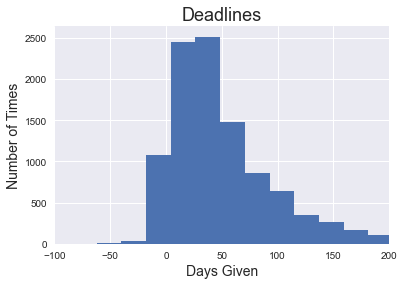

In [112]:
%matplotlib inline
plt.hist(data['Days from Enter to Due'], bins = 25)
plt.title('Deadlines', fontsize = 18)
plt.xlabel('Days Given', fontsize = 14)
plt.ylabel('Number of Times', fontsize = 14)
plt.style.use('seaborn')
plt.xlim(xmin = -100, xmax = 200);
#

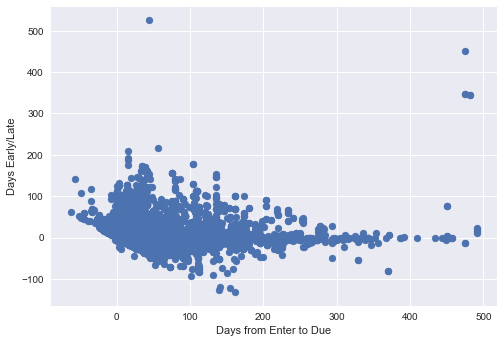

In [113]:
x = data['Days from Enter to Due']
y = data['Days Early/Late']
plt.scatter(x, y)
plt.xlabel('Days from Enter to Due')
plt.ylabel('Days Early/Late'); #Little to no correlation between short deadlines and being increasingly late.